## Superfund cleanups and near-port community composition for Seattle 

Ashli Blow 
The new working notebook is named "Seattle", and Seattle Draft V1, Seattle Draft V2, and Seattle Draft V3 are reference notebooks. 

### Import Data & Packages

In [1]:
import os
import requests

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
import xyzservices.providers as xyz

In [15]:
datadir = '/home/jovyan/superfund-gentrification/Data'
fixed_fn = '/home/jovyan/superfund-gentrification/Data/fixed_effects.csv'
socio_stand_fn = '/home/jovyan/superfund-gentrification/Data/socio_stand.csv'
socio_nom_fn = '/home/jovyan/superfund-gentrification/Data/socio_nominal.csv'

In [3]:
print("Fixed Effects Data:", fixed_fn)
print("Socioeconomic Data - Standard:", socio_stand_fn)
print("Socioeconomic Data - Nomnial:", socio_nom_fn)

Fixed Effects Data: /home/jovyan/superfund-gentrification/Data/fixed_effects.csv
Socioeconomic Data - Standard: /home/jovyan/superfund-gentrification/Data/socio_characteristics_nominal_west_coast.csv
Socioeconomic Data - Nomnial: /home/jovyan/superfund-gentrification/Data/socio_characteristics_standardized_west_coast.csv


In [4]:
fixed_df = pd.read_csv(fixed_fn)
aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'
fixed_gdf = gpd.GeoDataFrame(fixed_df, crs='EPSG:4326', geometry=gpd.points_from_xy(fixed_df['lon'], fixed_df['lat']))
fixed_gdf_aea = fixed_gdf.to_crs(aea_proj_str)
fixed_gdf_aea

,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,5400.0,1.097005e+09,Deleted NPL Site,Completed,1,0,0,1,1,POINT (2500797.782 -855198.329)
1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,...,5702.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500633.447 -836762.935)
2,Triana/Tennessee River,61.42,Alabama,"Limestone, Madison, Morgan","Limestone, Morgan",Signal Point Dr,35754.0,34.508888,-86.638194,1.0,...,5704.0,1.103006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2504565.873 -426248.662)
3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,Bucks,US 43,36560.0,30.975000,-88.021389,1.0,...,5800.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500091.552 -836295.442)
4,T.H. Agriculture & Nutrition Co. (Montgomery P...,44.46,Alabama,Montgomery,Montgomery,Birmingham Hwy,36108.0,32.376100,-86.379100,1.0,...,6000.0,1.101006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2602153.612 -641411.339)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,"Oconomowoc Electroplating Co., Inc.",31.86,Wisconsin,Dodge,Ashippun,573 Oak St,53003.0,43.214100,-88.522100,55.0,...,961500.0,5.502796e+10,NPL Site,In Process,0,0,0,0,0,POINT (2053565.558 445284.543)
1743,Penta Wood Products,50.00,Wisconsin,Burnett,Daniels,Daniels 70,54872.0,45.784508,-92.431204,55.0,...,970800.0,5.501397e+10,NPL Site,In Process,0,0,0,0,0,POINT (1677150.060 636047.765)
1744,F.E. Warren Air Force Base,39.23,Wyoming,Laramie,Cheyenne,Ft Warren Ave,82001.0,41.156669,-104.862200,56.0,...,1100.0,5.602100e+10,NPL Site,In Process,0,0,0,0,0,POINT (785213.296 -50999.019)
1745,Mystery Bridge Rd/U.S. Highway 20,32.10,Wyoming,Natrona,Evansville,Broomtail Trl,82636.0,42.860581,-106.228800,56.0,...,1801.0,5.602500e+10,Deleted NPL Site,Completed,1,0,0,1,1,POINT (653765.704 126560.897)


In [16]:
socio_stand = pd.read_csv(socio_stand_fn)
socio_stand_df = pd.DataFrame(socio_stand)
socio_stand_df.head()

socio_stand_gdf = gpd.GeoDataFrame(socio_stand_df)
socio_stand_gdf.head()

,state,statefip,county,countyfip,tract,18under1990,18under2000,18under2010,18under2020,18over1990,...,nhpi2010,nhpi2020,gqi1990,gqi2000,gqi2010,gqi2020,gqni1990,gqni2000,gqni2010,gqni2020
0,California,6,Colusa County,11,100,1222.48,1486.95,1600,1543.0,2577.91,...,10,9.0,0.0,5.0,0,0.0,71.14,0.0,0,0.0
1,California,6,Fresno County,19,100,19.00,28.00,16,96.0,2253.00,...,2,11.0,1816.0,2318.0,2344,2793.0,0.00,21.0,23,84.0
2,California,6,Humboldt County,23,100,913.00,927.00,814,852.0,2927.00,...,32,67.0,0.0,0.0,12,21.0,93.00,206.0,763,634.0
3,California,6,Inyo County,27,100,662.01,708.03,613,598.0,2050.07,...,3,0.0,0.0,0.0,0,0.0,0.00,2.0,8,0.0
4,California,6,Kings County,31,100,1063.10,1007.10,965,744.0,2481.29,...,1,4.0,0.0,0.0,0,0.0,0.00,10.0,8,0.0


In [28]:
race = socio_stand_gdf[['state', 'statefip', 'county', 'countyfip', 'tract',
                        'white1990', 'black1990', 'aian1990', 'asian1990', 'nhpi1990', 'hl1990', 
                        'white2000', 'black2000', 'aian2000', 'asian2000', 'nhpi2000', 'hl2000', 
                        'white2010', 'black2010', 'aian2010', 'asian2010', 'nhpi2010', 'hl2010', 
                        'white2020', 'black2020', 'aian2020', 'asian2020', 'nhpi2020', 'hl2020']]

race_df = pd.concat([race], axis=1)
race_df.head()

,state,statefip,county,countyfip,tract,white1990,black1990,aian1990,asian1990,nhpi1990,...,aian2010,asian2010,nhpi2010,hl2010,white2020,black2020,aian2020,asian2020,nhpi2020,hl2020
0,California,6,Colusa County,11,100,2628.25,8.0,45.0,20.00,6.00,...,65,41,10,3120,2358.0,37.0,71.0,52.0,9.0,3528.0
1,California,6,Fresno County,19,100,718.00,437.0,22.0,45.00,0.00,...,36,130,2,1594,1180.0,574.0,77.0,60.0,11.0,2068.0
2,California,6,Humboldt County,23,100,3302.00,82.0,205.0,171.00,9.00,...,179,151,32,693,2945.0,142.0,231.0,234.0,67.0,993.0
3,California,6,Inyo County,27,100,2608.08,2.0,33.0,25.00,1.00,...,40,48,3,512,1933.0,4.0,68.0,48.0,0.0,842.0
4,California,6,Kings County,31,100,2783.33,9.0,7.0,40.03,1.01,...,34,53,1,1321,1847.0,23.0,21.0,45.0,4.0,1154.0


In [31]:
# List of races
races = ['white', 'black', 'aian', 'asian', 'nhpi', 'hl']

# List of years
years = ['1990', '2000', '2010', '2020']

# Calculate the percentage for each race and each year
for year in years:
    total_population = race_df[[f'{race}{year}' for race in races]].sum(axis=1)
    for race in races:
        race_df[f'per{race}{year}'] = race_df[f'{race}{year}'] / total_population

# Create a DataFrame with the state, statefip, county, countfip, tract, and percentage columns
per_race_df = race_df[['state', 'statefip', 'county', 'countyfip', 'tract'] + [f'per{race}{year}' for race in races for year in years]]

per_race_df

,state,statefip,county,countyfip,tract,perwhite1990,perwhite2000,perwhite2010,perwhite2020,perblack1990,...,perasian2010,perasian2020,pernhpi1990,pernhpi2000,pernhpi2010,pernhpi2020,perhl1990,perhl2000,perhl2010,perhl2020
0,California,6,Colusa County,11,100,0.592547,0.490350,0.502365,0.389430,0.001804,...,0.006257,0.008588,0.001353,0.003374,0.001526,0.001486,0.389642,0.480971,0.476118,0.582659
1,California,6,Fresno County,19,100,0.296205,0.318500,0.484198,0.297229,0.180281,...,0.029988,0.015113,0.000000,0.000954,0.000461,0.002771,0.495875,0.486650,0.367705,0.520907
2,California,6,Humboldt County,23,100,0.821802,0.765889,0.761735,0.638552,0.020408,...,0.029907,0.050737,0.002240,0.002080,0.006338,0.014527,0.061971,0.120176,0.137255,0.215308
3,California,6,Inyo County,27,100,0.919928,0.883949,0.796117,0.667703,0.000705,...,0.016070,0.016580,0.000353,0.000000,0.001004,0.000000,0.058555,0.095047,0.171409,0.290846
4,California,6,Kings County,31,100,0.716349,0.690061,0.642396,0.596962,0.002316,...,0.013171,0.014544,0.000260,0.002996,0.000249,0.001293,0.268971,0.282431,0.328280,0.372980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10344,Washington,53,San Juan County,55,990100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10345,Washington,53,Skagit County,57,990100,NaN,NaN,NaN,0.444444,NaN,...,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.500000
10346,Washington,53,Snohomish County,61,990100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10347,Washington,53,Thurston County,67,990100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
per_race_df = per_race_df.rename(columns={'tract': 'tracts'})
per_race_df.head()

,state,statefip,county,countyfip,tracts,perwhite1990,perwhite2000,perwhite2010,perwhite2020,perblack1990,...,perasian2010,perasian2020,pernhpi1990,pernhpi2000,pernhpi2010,pernhpi2020,perhl1990,perhl2000,perhl2010,perhl2020
0,California,6,Colusa County,11,100,0.592547,0.490350,0.502365,0.389430,0.001804,...,0.006257,0.008588,0.001353,0.003374,0.001526,0.001486,0.389642,0.480971,0.476118,0.582659
1,California,6,Fresno County,19,100,0.296205,0.318500,0.484198,0.297229,0.180281,...,0.029988,0.015113,0.000000,0.000954,0.000461,0.002771,0.495875,0.486650,0.367705,0.520907
2,California,6,Humboldt County,23,100,0.821802,0.765889,0.761735,0.638552,0.020408,...,0.029907,0.050737,0.002240,0.002080,0.006338,0.014527,0.061971,0.120176,0.137255,0.215308
3,California,6,Inyo County,27,100,0.919928,0.883949,0.796117,0.667703,0.000705,...,0.016070,0.016580,0.000353,0.000000,0.001004,0.000000,0.058555,0.095047,0.171409,0.290846
4,California,6,Kings County,31,100,0.716349,0.690061,0.642396,0.596962,0.002316,...,0.013171,0.014544,0.000260,0.002996,0.000249,0.001293,0.268971,0.282431,0.328280,0.372980


In [33]:
per_race_df.tracts

0           100
1           100
2           100
3           100
4           100
          ...  
10344    990100
10345    990100
10346    990100
10347    990100
10348    992201
Name: tracts, Length: 10349, dtype: int64

In [34]:
fixed_gdf_aea.tracts

0         5400.0
1         5702.0
2         5704.0
3         5800.0
4         6000.0
          ...   
1742    961500.0
1743    970800.0
1744      1100.0
1745      1801.0
1746    962700.0
Name: tracts, Length: 1747, dtype: float64

In [42]:
fixed_socio_df = fixed_gdf_aea.merge(per_race_df, on="tracts")
fixed_socio_df.head()

,site,sitescore,state_x,county_x,city,street,zip,lat,lon,state_fips,...,perasian2010,perasian2020,pernhpi1990,pernhpi2000,pernhpi2010,pernhpi2020,perhl1990,perhl2000,perhl2010,perhl2020
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,0.012318,0.022666,0.002241,0.002021,0.002250,0.001803,0.291923,0.461040,0.517233,0.643786
1,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,0.080623,0.085510,0.002402,0.002348,0.002169,0.001919,0.115754,0.082703,0.107667,0.154387
2,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,0.034537,0.040964,0.001810,0.001342,0.001756,0.000402,0.017748,0.027224,0.039415,0.067871
3,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,0.082082,0.131807,0.001509,0.001672,0.000617,0.001489,0.028679,0.030100,0.045670,0.064638
4,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,...,0.074301,0.073179,0.000302,0.000203,0.000699,0.000537,0.089264,0.128875,0.179196,0.256039


In [43]:
fixed_socio_gdf = gpd.GeoDataFrame(fixed_socio_df, geometry='geometry')

<Axes: >

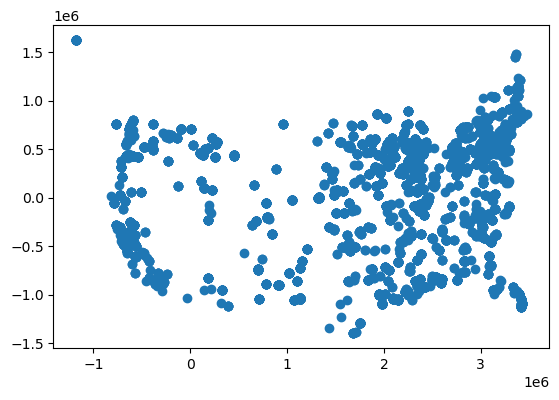

In [45]:
fixed_socio_gdf.plot()

### Washington 

In [73]:
wa_fn = '/home/jovyan/superfund-gentrification/Data/WaTracts/tl_2020_53_tract.shp'
wa_gdf = gpd.read_file(wa_fn)

wa_gdf_aea = wa_gdf.to_crs(aea_crs)

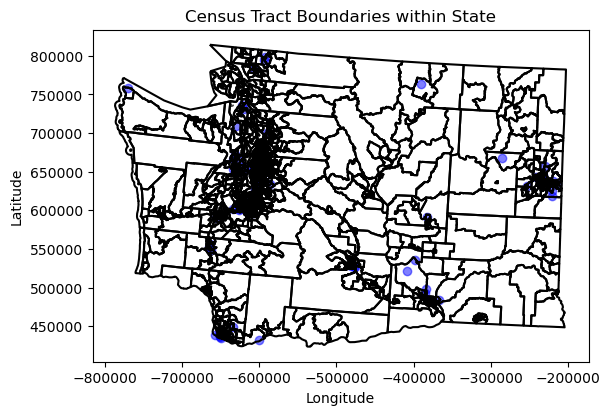

In [74]:
# Load the shapefile into a GeoDataFrame
wa_gdf = gpd.read_file(wa_fn)

# Convert the CRS to match that of fixed_gdf_aea
wa_gdf_aea = wa_gdf.to_crs(fixed_gdf_aea.crs)

# Clip fixed_gdf_aea with wa_gdf_aea
wa_gdf_clipped = gpd.clip(fixed_gdf_aea, wa_gdf_aea)

# Plot the state and the clipped data
f, ax = plt.subplots()
wa_gdf_aea.boundary.plot(ax=ax, color='k')
wa_gdf_clipped.plot(ax=ax, color='blue', alpha=0.5)
plt.title('Census Tract Boundaries within State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [78]:
wa_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,53,053,072309,53053072309,723.09,Census Tract 723.09,G5020,S,3281057,2231211,+47.2193054,-122.5672166,"POLYGON ((-122.57554 47.22952, -122.56544 47.2..."
1,53,053,072311,53053072311,723.11,Census Tract 723.11,G5020,S,2443688,6948,+47.2314021,-122.5306088,"POLYGON ((-122.53713 47.21807, -122.53713 47.2..."
2,53,053,072407,53053072407,724.07,Census Tract 724.07,G5020,S,5422703,4068418,+47.2984283,-122.5635099,"POLYGON ((-122.61063 47.30733, -122.61060 47.3..."
3,53,053,072408,53053072408,724.08,Census Tract 724.08,G5020,S,15266925,5205736,+47.2877797,-122.5899163,"POLYGON ((-122.61886 47.29884, -122.61885 47.2..."
4,53,053,072409,53053072409,724.09,Census Tract 724.09,G5020,S,5871772,2575269,+47.2832879,-122.6150486,"POLYGON ((-122.64978 47.27622, -122.64950 47.2..."


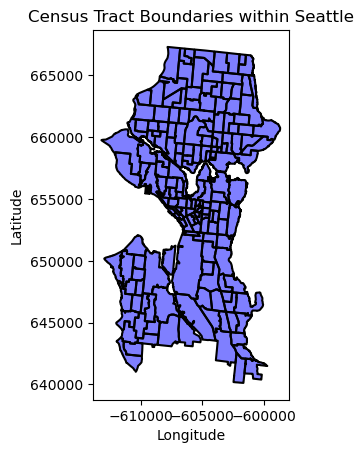

In [111]:
# Load the shapefile or GeoJSON file for Seattle into a GeoDataFrame
seattle_gdf = gpd.read_file('/home/jovyan/superfund-gentrification/Data/2020_Census_Tracts_Seattle.geojson')

# Convert the CRS to match that of wa_gdf_aea
seattle_gdf_aea = seattle_gdf.to_crs(wa_gdf_aea.crs)

# Clip wa_gdf_aea with seattle_gdf_aea
wa_gdf_clipped_seattle = gpd.clip(wa_gdf_aea, seattle_gdf_aea)

# Plot the city and the clipped data
f, ax = plt.subplots()
seattle_gdf_aea.boundary.plot(ax=ax, color='k')
wa_gdf_clipped_seattle.plot(ax=ax, color='blue', alpha=0.5)
plt.title('Census Tract Boundaries within Seattle')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [117]:
wa_gdf_clipped_seattle.rename(columns={'NAME': 'tracts'}, inplace=True)
wa_gdf_clipped_seattle.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,tracts,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
313,53,033,026300,53033026300,263,Census Tract 263,G5020,S,4224982,323989,+47.5036921,-122.2847033,"MULTIPOLYGON (((-603751.172 643535.490, -60375..."
239,53,033,011700,53033011700,117,Census Tract 117,G5020,S,3515808,0,+47.5201682,-122.2828633,"POLYGON ((-604041.589 644181.413, -604036.416 ..."
164,53,033,011101,53033011101,111,Census Tract 111.01,G5020,S,1136851,0,+47.5394734,-122.2773089,"POLYGON ((-603045.355 645876.736, -602931.398 ..."
1162,53,033,026102,53033026102,261,Census Tract 261.02,G5020,S,1576655,0,+47.4949418,-122.2498458,"POLYGON ((-600935.723 640859.302, -600930.901 ..."
305,53,033,026001,53033026001,260,Census Tract 260.01,G5020,S,2660203,0,+47.4988699,-122.2358957,"MULTIPOLYGON (((-600217.027 640799.113, -60030..."


In [113]:
wa_gdf_clipped_seattle['tracts'] = wa_gdf_clipped_seattle['tracts'].astype('float64').round().astype('int64')

In [114]:
per_race_df.tracts

0           100
1           100
2           100
3           100
4           100
          ...  
10344    990100
10345    990100
10346    990100
10347    990100
10348    992201
Name: tracts, Length: 10349, dtype: int64

In [115]:
results_test = wa_gdf_clipped_seattle.merge(per_race_df, on="tracts", how="left")
results_test

,STATEFP,COUNTYFP,TRACTCE,GEOID,tracts,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,perasian2010,perasian2020,pernhpi1990,pernhpi2000,pernhpi2010,pernhpi2020,perhl1990,perhl2000,perhl2010,perhl2020
0,53,033,026300,53033026300,263,Census Tract 263,G5020,S,4224982,323989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53,033,011700,53033011700,117,Census Tract 117,G5020,S,3515808,0,...,0.358393,0.515558,0.000472,0.000737,0.000257,0.001622,0.108978,0.161568,0.180098,0.187141
2,53,033,011101,53033011101,111,Census Tract 111.01,G5020,S,1136851,0,...,0.174837,0.354541,0.000990,0.001801,0.000686,0.000715,0.118173,0.148131,0.193349,0.223729
3,53,033,026102,53033026102,261,Census Tract 261.02,G5020,S,1576655,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53,033,026001,53033026001,260,Census Tract 260.01,G5020,S,2660203,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,53,033,003301,53033003301,33,Census Tract 33.01,G5020,S,669207,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,53,033,003201,53033003201,32,Census Tract 32.01,G5020,S,1152079,1354300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,53,033,003100,53033003100,31,Census Tract 31,G5020,S,2236733,472744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,53,033,001500,53033001500,15,Census Tract 15,G5020,S,1167711,526885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


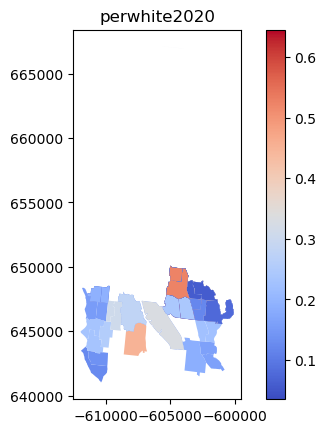

In [116]:
# Plot the data
fig, ax = plt.subplots(1, 1)
results_test.plot(column='perhl2020', ax=ax, legend=True, cmap='coolwarm')
plt.title('perwhite2020')
plt.show()